In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
match = pd.read_csv('D://InningsInsights(Python Individual)//datasets//matches.csv')
delivery = pd.read_csv('D://InningsInsights(Python Individual)//datasets//deliveries.csv')

In [3]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
match.shape

(1095, 20)

In [6]:
delivery.shape

(260920, 17)

In [7]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [8]:
# Selecting first innings score to find the target of each match
total_score_df=total_score_df[total_score_df['inning']==1]

In [9]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [10]:
# Define the range of IDs to be deleted
id_min = 1422119
id_max = 1426312

# Filter out rows with IDs in the specified range
match_df_filtered = match_df[(match_df['id'] < id_min) | (match_df['id'] > id_max)]

In [11]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
teams=[
    'Royal Challengers Bengaluru',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Punjab Kings',
    'Delhi Capitals',
    'Sunrisers Hyderabad',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Kolkata Knight Riders',
    'Mumbai Indians'
]

In [13]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [14]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(1006, 22)

In [16]:
match_df[match_df['method']=='D/L']['method'].value_counts()

method
D/L    17
Name: count, dtype: int64

In [17]:
match_df=match_df[match_df['method']!='D/L']

In [18]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [19]:
match_df=match_df[['match_id','city','winner','total_runs','target_runs','venue']]

In [20]:
match_df[match_df['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: count, dtype: int64

In [21]:
cities=np.where(match_df['city'].isnull(),match_df['venue'].str.split().apply(lambda x:x[0]),match_df['city'])

In [22]:
match_df['city']=cities

In [23]:
match_df.merge(delivery,on='match_id')

,match_id,city,winner,total_runs_x,target_runs,venue,inning,batting_team,bowling_team,over,...,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237123,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
237124,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
237125,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
237126,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [24]:
delivery_df=match_df.merge(delivery,on='match_id')

In [25]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [26]:
delivery_df.shape

(114648, 22)

In [27]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [28]:
delivery_df['runs_left']=delivery_df['target_runs']-delivery_df['current_score']

In [29]:
delivery_df.head()

,match_id,city,winner,total_runs_x,target_runs,venue,inning,batting_team,bowling_team,over,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,1,0,1,NaN,0,NaN,NaN,NaN,1,222.0
125,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,0,1,1,wides,0,NaN,NaN,NaN,2,221.0
126,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,0,0,0,NaN,0,NaN,NaN,NaN,2,221.0
127,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,1,0,1,NaN,0,NaN,NaN,NaN,3,220.0
128,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,1,0,1,NaN,0,NaN,NaN,NaN,4,219.0


In [30]:
delivery_df['is_legal_delivery'] = ~delivery_df['extras_type'].isin(['wides','noballs'])
delivery_df['legal_balls_bowled']=delivery_df.groupby('match_id')['is_legal_delivery'].cumsum()
delivery_df['balls_left'] = 120 - delivery_df['legal_balls_bowled']

In [31]:
delivery_df.head()

,match_id,city,winner,total_runs_x,target_runs,venue,inning,batting_team,bowling_team,over,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,is_legal_delivery,legal_balls_bowled,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,NaN,0,NaN,NaN,NaN,1,222.0,True,1,119
125,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,wides,0,NaN,NaN,NaN,2,221.0,False,1,119
126,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,NaN,0,NaN,NaN,NaN,2,221.0,True,2,118
127,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,NaN,0,NaN,NaN,NaN,3,220.0,True,3,117
128,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,NaN,0,NaN,NaN,NaN,4,219.0,True,4,116


In [32]:
delivery_df['wickets_left'] = delivery_df.groupby('match_id')['is_wicket'].cumsum()
delivery_df['wickets_left']=10-delivery_df['wickets_left']

In [33]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,target_runs,venue,inning,batting_team,bowling_team,over,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,is_legal_delivery,legal_balls_bowled,balls_left,wickets_left
237123,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,0,NaN,NaN,NaN,110,4.0,True,59,61,8
237124,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,0,NaN,NaN,NaN,111,3.0,True,60,60,8
237125,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,0,NaN,NaN,NaN,112,2.0,True,61,59,8
237126,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,0,NaN,NaN,NaN,113,1.0,True,62,58,8
237127,1426312,Chennai,Kolkata Knight Riders,113,114.0,"MA Chidambaram Stadium, Chepauk, Chennai",2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,0,NaN,NaN,NaN,114,0.0,True,63,57,8


In [34]:
delivery_df['overs_faced'] = delivery_df['over'] + (delivery_df['ball'] / 6.0)
delivery_df['current_run_rate'] = delivery_df['current_score'] / delivery_df['overs_faced']

In [35]:
delivery_df['total_overs']=20
delivery_df['overs_left'] = delivery_df['total_overs'] - delivery_df['overs_faced']
delivery_df['overs_left'] = delivery_df.groupby('match_id')['total_overs'].transform(lambda x: x.iloc[0]) - delivery_df['overs_faced']
# apply() function is for each row 
delivery_df['required_run_rate'] = delivery_df.apply(
    lambda row: (row['runs_left']) / row['overs_left']
    if row['overs_left'] > 0 else np.nan,  # Handle division by zero if no overs left
    axis=1
)

In [36]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,target_runs,venue,inning,batting_team,bowling_team,over,...,runs_left,is_legal_delivery,legal_balls_bowled,balls_left,wickets_left,overs_faced,current_run_rate,total_overs,overs_left,required_run_rate
124,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,222.0,True,1,119,10,0.166667,6.0,20,19.833333,11.193277
125,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,221.0,False,1,119,10,0.333333,6.0,20,19.666667,11.237288


In [37]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [38]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [39]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,target_runs,venue,inning,batting_team,bowling_team,over,...,is_legal_delivery,legal_balls_bowled,balls_left,wickets_left,overs_faced,current_run_rate,total_overs,overs_left,required_run_rate,result
124,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,True,1,119,10,0.166667,6.0,20,19.833333,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,222,223.0,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,...,False,1,119,10,0.333333,6.0,20,19.666667,11.237288,0


In [40]:
teams=[
    'Royal Challengers Bengaluru',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Punjab Kings',
    'Delhi Capitals',
    'Sunrisers Hyderabad',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Kolkata Knight Riders',
    'Mumbai Indians'
]

In [41]:
delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')

In [42]:
delivery_df=delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df=delivery_df[delivery_df['bowling_team'].isin(teams)]

In [43]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','current_run_rate','required_run_rate','result']]

In [44]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
124,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,222.0,119,10,222,6.0,11.193277,0
125,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,221.0,119,10,222,6.0,11.237288,0
126,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,221.0,118,10,222,4.0,11.333333,0
127,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,220.0,117,10,222,4.5,11.379310,0
128,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,219.0,116,10,222,4.8,11.426087,0


In [45]:
final_df.dropna(inplace=True)
final_df = final_df.drop_duplicates()

In [46]:
# Shuffling the data 
final_df=final_df.sample(final_df.shape[0])

In [47]:
y=final_df['result']
x=final_df.drop('result',axis=1)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape) 

(91299, 9) (91299,)
(22825, 9) (22825,)


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
],remainder='passthrough')

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics as m

In [51]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [52]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print(m.accuracy_score(y_test,y_pred))
print(m.r2_score(y_test,y_pred))

0.804118291347207
0.2153147265319182


In [53]:
pipe.predict_proba(x_test)[29]

array([0.99852481, 0.00147519])

In [54]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]

    # DataFrame is empty.
    if match.empty:
        print(f"No data available for match_id {match_id}. Available match_ids: {x_df['match_id'].unique()}")
        return None, None
    
    # Filter for end of over deliveries (ball = 6)
    match = match[match['ball'] == 6]
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'current_run_rate', 'required_run_rate']].dropna()

    # temp_df is empty after dropna()
    if temp_df.empty:
        print(f"Filtered DataFrame is empty after dropna() for match_id {match_id}.")
        return None, None
    
    # Remove rows where balls_left is 0
    temp_df = temp_df[temp_df['balls_left'] != 0]
    if temp_df.empty:
        print(f"No valid data after filtering for balls_left for match_id {match_id}.")
        return None, None
    
    # Predict probabilities using the pipeline
    try:
        result = pipe.predict_proba(temp_df)
    except ValueError as e:
        print(f"Prediction failed: {e}")
        return None, None
    
    # Calculate lose and win probabilities
    # result[:, 0] probability of losing team in the match.T[0]=Transpose the matrix
    # result[:, 1] probability of winning team in the match
    temp_df['lose'] = np.round(result.T[0] * 100, 2)
    temp_df['win'] = np.round(result.T[1] * 100, 2)

    # Add an 'end_of_over' column
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    # Calculate runs_after_over
    target = temp_df['total_runs_x'].values[0]
    runs_left = temp_df['runs_left'].values
    runs_after_over = np.insert(runs_left, 0, target)[:-1] - runs_left
    temp_df['runs_after_over'] = runs_after_over
    
    # Calculate wickets_in_over
    wickets_left = temp_df['wickets_left'].values
    new_wickets_left = np.insert(wickets_left, 0, 10)
    temp_df['wickets_in_over'] = new_wickets_left[:-1] - wickets_left
    
    print("Target -", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    
    return temp_df, target


In [55]:
temp_df, target = match_progression(delivery_df,335991, pipe)
temp_df

Target - 182


,end_of_over,runs_after_over,wickets_in_over,lose,win
2256,1,1.0,0,68.85,31.15
2262,2,12.0,0,57.91,42.09
2269,3,4.0,2,80.91,19.09
2275,4,3.0,0,82.72,17.28
2282,5,13.0,0,75.46,24.54
2288,6,5.0,0,76.17,23.83
2294,7,6.0,0,75.53,24.47
2301,8,15.0,0,63.07,36.93
2308,9,5.0,1,75.85,24.15
2314,10,2.0,1,87.74,12.26


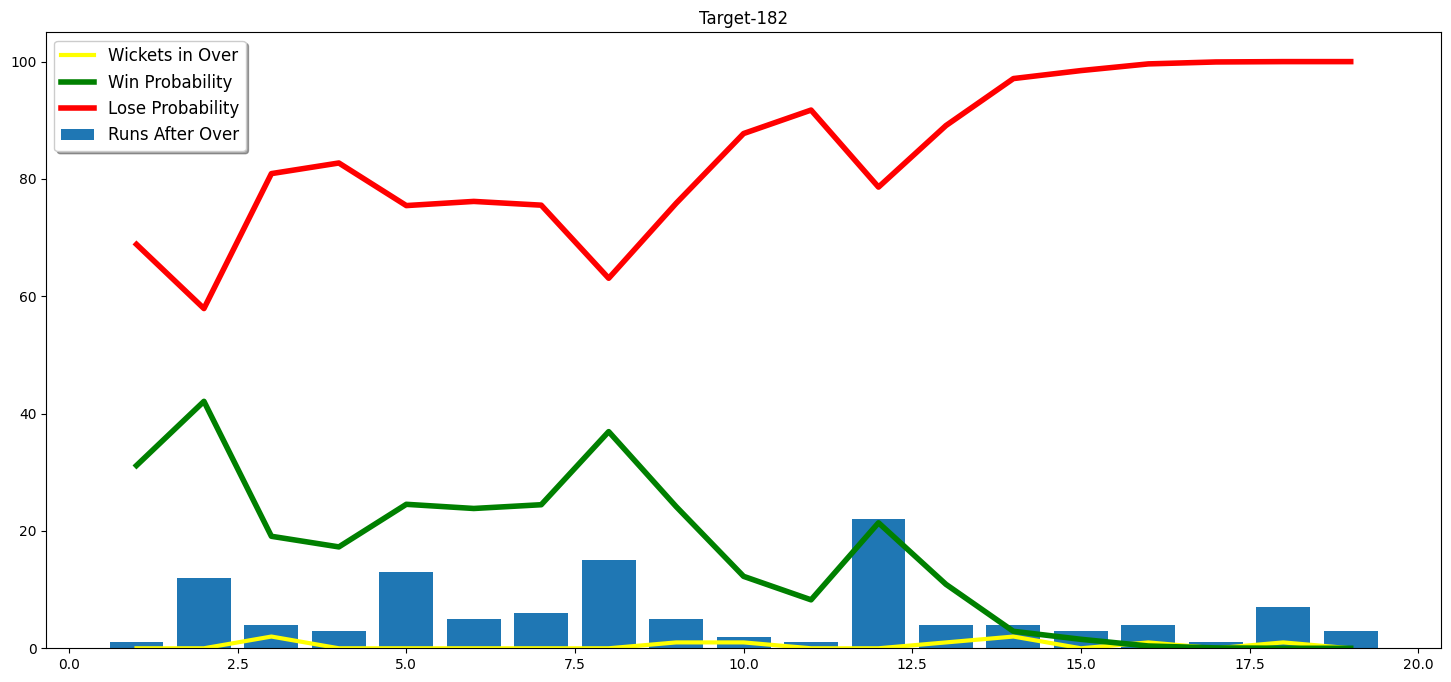

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3,label='Wickets in Over')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4,label='Win Probability')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='Lose Probability')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],label='Runs After Over')
plt.title('Target-' + str(target))
plt.legend(fontsize='12', frameon=True, shadow=True) 
plt.show()

In [57]:
import pickle
pickle.dump(pipe,open('D://InningsInsights(Python Individual)//innings_insights//pkl//win_prediction.pkl','wb'))

In [58]:
# import joblib
# joblib.dump(pipe,'D://InningsInsights(Python Individual)//joblib//win_prediction.joblib')

In [59]:
teams

['Royal Challengers Bengaluru',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Punjab Kings',
 'Delhi Capitals',
 'Sunrisers Hyderabad',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Kolkata Knight Riders',
 'Mumbai Indians']

In [60]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru', 'Indore',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [61]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'target_runs', 'venue',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter',
       'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind',
       'fielder', 'current_score', 'runs_left', 'is_legal_delivery',
       'legal_balls_bowled', 'balls_left', 'wickets_left', 'overs_faced',
       'current_run_rate', 'total_overs', 'overs_left', 'required_run_rate',
       'result'],
      dtype='object')

A .pkl file is a file format used to store Python objects, typically for serialization purposes. It uses Python's pickle module to serialize (convert into a byte stream) and deserialize (convert back from a byte stream) Python objects.

What?
Logistic Regression is straightforward, interpretable, and provides probabilities of the outcomes.


Why ?
Simplicity and Interpretability : Logistic regression is straightforward and easy to implement. The coefficients of the model can be interpreted directly in terms of odds, making it easier to understand the influence of each feature on the outcome.

Probabilistic Output : It provides probabilities for the classes, allowing you to gauge the certainty of predictions. 

Efficiency : Logistic regression is computationally efficient and performs well with smaller datasets. It is less prone to overfitting, especially with fewer features.

Binary Outcomes : It is specifically designed for binary outcomes. It uses the logistic function to model the probability of the positive class.

Foundation for More Complex Models : Understanding logistic regression lays the groundwork for more complex models. Many advanced classification algorithms are extensions or variations of logistic regression.

Limitations:
Linearity Assumption.
Sensitive to Outliers.
Might not capture complex relationships or interactions well.

In [62]:
from sklearn import metrics as m
print(m.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     10735
           1       0.82      0.81      0.81     12090

    accuracy                           0.80     22825
   macro avg       0.80      0.80      0.80     22825
weighted avg       0.80      0.80      0.80     22825

